# Performance Test Report

#### Environment
**Hardware:**  
    - Machine: 2024 MacBook Pro  
    - Chip: Apple M4  
    - Memory: 16 GB  

**Software:**  
    - Operating System: macOS Sequoia 15.6.1  
    - Python Version: 3.12.11  


#### Data Structures Tested
- 2-3-4 Tree  
- Skip List  
- Bloom Filter  
- Cuckoo Filter  
- KD Tree  
- Vantage Point Tree  
- Max Heap  


##### Notes
- **Data Used:** Seeded random data with seed 42 for all tests.
- **Search/Query, Delete:** Benchmarks for search, delete, insert, etc, only measure the time for the specified operation. Time to build or initialize the data structure is not included in these measurements.
- **Estimated Time to Run Report:** 18 minutes on the listed machine. 
- Sizes chosen in the following experiments were intended to be large enough to demonstrate the asymptotic behavior, but small enough to run in a reasonable time.





In [1]:
from matplotlib import pyplot as plt
import numpy as np
from Graphing import *
from TwoThreeFourTree import Tree
from SkipList import SkipList
from Filter.BloomFilter import BloomFilter
from Filter.CuckooFilter import CuckooFilter
from DimensionalTrees.kd_tree import KDTree
from DimensionalTrees.vp_tree import VPTree
from Heap.array_heap import ArrayMaxHeap

## 234 Tree

A 234 tree is a self-balancing search tree in which nodes can contain multiple keys and children. All leaves are gauranteed to be at the same depth by restructuring the tree when necessary, which provide logarithmic time (with respect the the number of nodes in the tree) for all operations. Storing multiple keys per node reducess the heght of the tree and often improves cache performance. 234 trees are a specific case of B-trees which are often used in databases and file systems.

### 234 Tree Insert

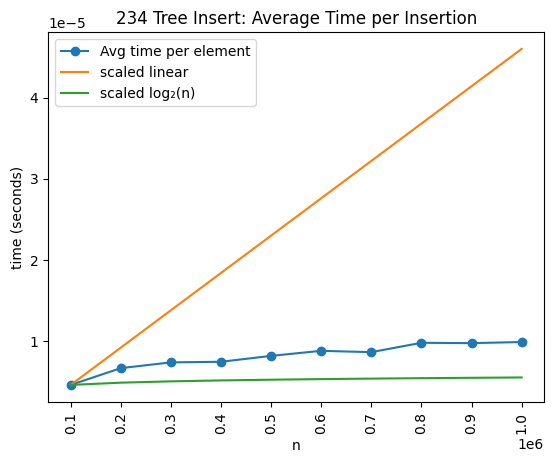

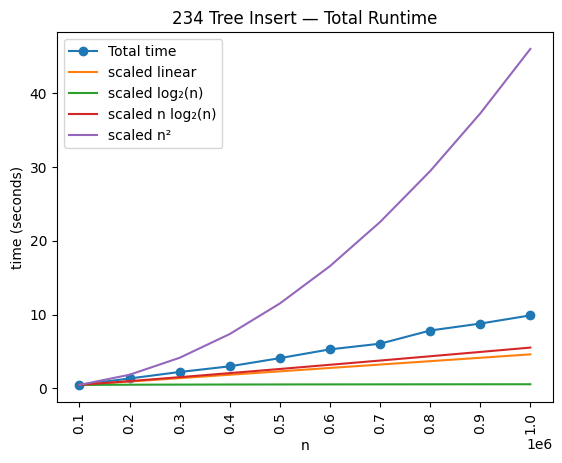

In [2]:
n = []
tree_total_times = []
tree_avg_times = []

step = 100000
stop = 1000000

for i in range(step, stop + 1, step):
    tree = Tree.TwoThreeFourTree()
    n.append(i)
    
    total_time = tree.benchmark_insert(i, 42)  # total time to insert i elements
    avg_time = total_time / i                    # average time per element
    
    tree_total_times.append(total_time)
    tree_avg_times.append(avg_time)

plot_with_reference_curves(n, tree_avg_times, label="Avg time per element", title="234 Tree Insert: Average Time per Insertion", show_nlogn=False)
plot_with_reference_curves(n, tree_total_times, label="Total time", title="234 Tree Insert — Total Runtime", show_n2=True)


**Interpretation:**  The charts reflect the expected behavior of the 234 tree. The average time to insert each element is on the order of log(n) while the time to insert all elements is on the order of O(nlogn). The slight deviation from O(logn) and O(nlog) curves can be attributed to constant overhead factors including node splits during insertion, additional pointer updates, and other implementation level details. These effects slightly inflate the measured runtime but do not change the overall asymptotic behavior.


### 234 Tree Search

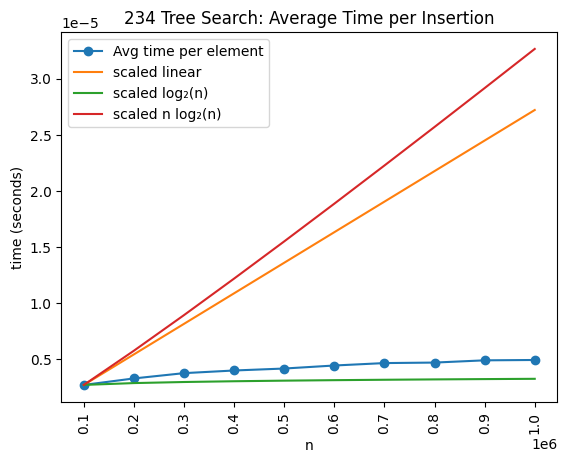

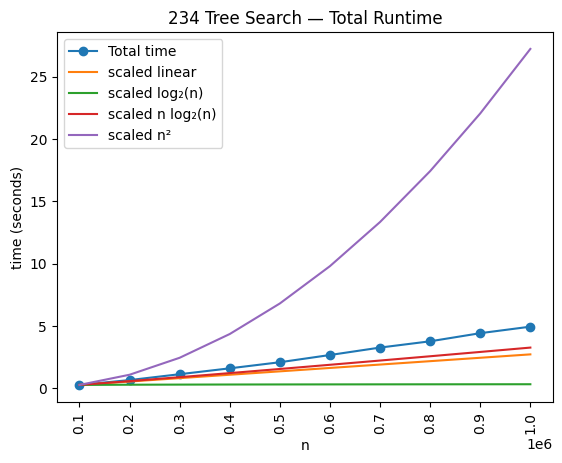

In [3]:
n = []
tree_total_times = []
tree_avg_times = []

step = 100000
stop = 1000000

for i in range(step, stop + 1, step):
    tree = Tree.TwoThreeFourTree()
    n.append(i)
    
    total_time = tree.benchmark_search(i, 42)  # total time to search i elements
    avg_time = total_time / i                    # average time per element
    
    tree_total_times.append(total_time)
    tree_avg_times.append(avg_time)

plot_with_reference_curves(n, tree_avg_times, label="Avg time per element", title="234 Tree Search: Average Time per Insertion")
plot_with_reference_curves(n, tree_total_times, label="Total time", title="234 Tree Search — Total Runtime", show_n2=True)


**Interpretation:**  Similiar results are attained for the search benchmark.

## SkipList

A skip list is a layered linked list data structure that stores elements in sorted order via probabilistic level assignment. By adding multiple levels of forward pointers, skiplists provide expected logarithmic time for search, insertion, and deletion. Skip lists provide similar performance to balanced trees but with simpler algorithms and easier implementation.

### Skiplist Insert

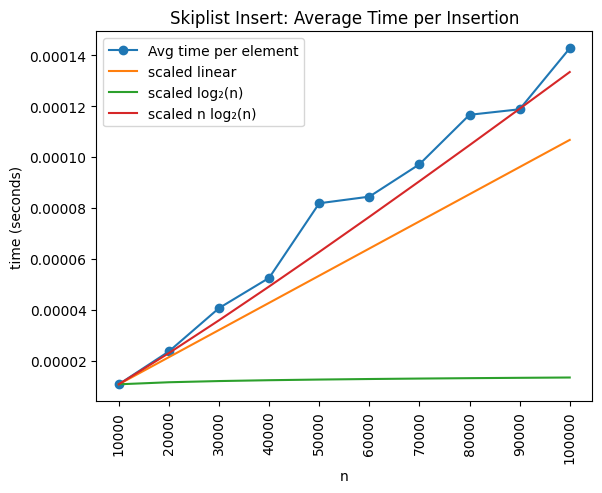

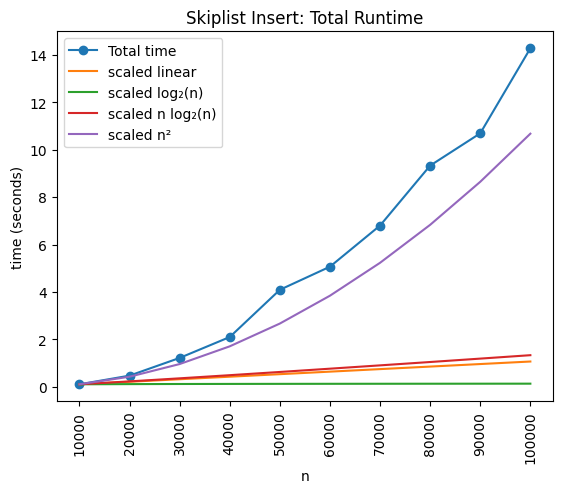

In [4]:
n = []
skiplist_insert_results = []
skiplist_insert_averages = []
step = 10000
stop = 100000
for i in range(step, stop+1, step):
    skiplist = SkipList.SkipList()
    n.append(i)
    total_time = skiplist.benchmark_insert(i, 42)
    skiplist_insert_results.append(total_time)
    skiplist_insert_averages.append(total_time / i)

plot_with_reference_curves(n, skiplist_insert_averages, label="Avg time per element", title="Skiplist Insert: Average Time per Insertion")
plot_with_reference_curves(n, skiplist_insert_results, label="Total time", title="Skiplist Insert: Total Runtime", show_n2=True)


**Interpretation:**  These charts show that the average insertion time increases with input size, trending toward O(nlogn), while the total insertion time approaches $O(n^2)$. This suggests that insertions become more expensive as the skip list grows rather than remaining strictly logarithmic as the theoretical cost predicts. The implementation of this SkipList very closely mirrors the implementation described in the paper by Pugh, but finds different results. My best guess as to why this difference ocurs is Python level overhead and poor cache locality from pointer traversals. I found [this](https://stackoverflow.com/questions/31580869/skip-lists-are-they-really-performing-as-good-as-pugh-paper-claim) post on Stack Overflow in which others state that they were unable to match the performance of a balanced tree with a SkipList. The users in the post suggest that the differences may be attributed to advancements in hardware, memory hierarchies, and compiler optimizations since the paper was published in 1989. The post goes into great detail and discusses additional performance tests. This was one of the more interesting findings from this performance report and helped highlight the importance of considering factors beyond the implementation alone.

### Skip List Delete

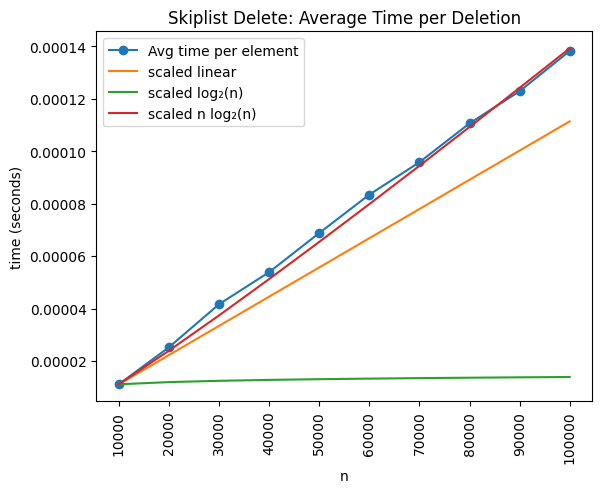

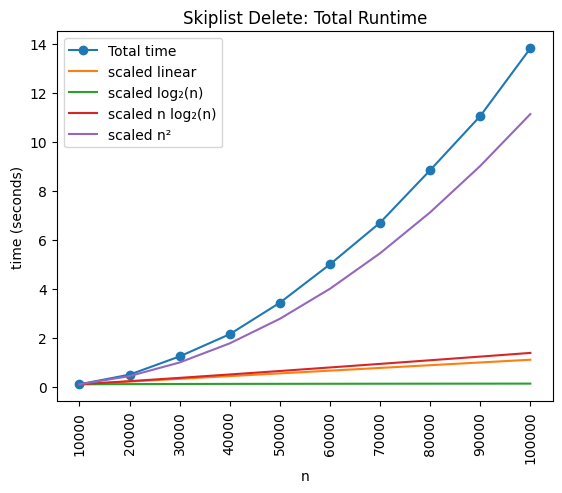

In [5]:
n = []
skiplist_total_times = []
skiplist_avg_times = []

step = 10000
stop = 100000

for i in range(step, stop + 1, step):
    skiplist = SkipList.SkipList()
    n.append(i)
    
    total_time = skiplist.benchmark_delete(i, 42)  
    avg_time = total_time / i                       
    
    skiplist_total_times.append(total_time)
    skiplist_avg_times.append(avg_time)

plot_with_reference_curves(n, skiplist_avg_times, label="Avg time per element", title="Skiplist Delete: Average Time per Deletion")
plot_with_reference_curves(n, skiplist_total_times, label="Total time", title="Skiplist Delete: Total Runtime", show_n2=True)



**Interpretation:**  Similiar asymptotic results were obtained from the delete benchmark. The actual time to delete elements was longer than the time to insert becuase the method has to first locate the node like search, then update all forward pointers at every level of the node being removed, and potentially adjust the current skip list level.

### Skip List Search

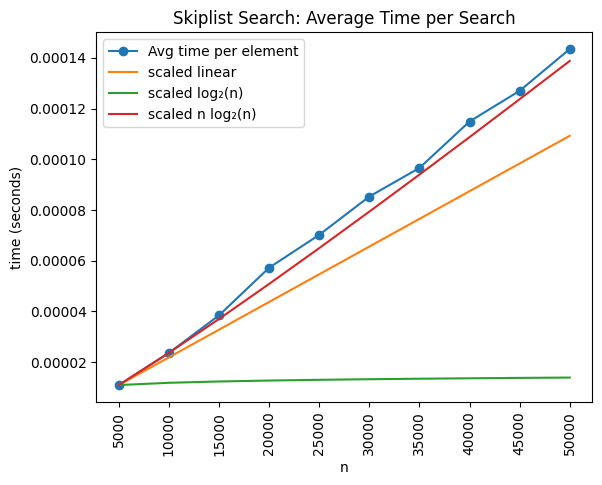

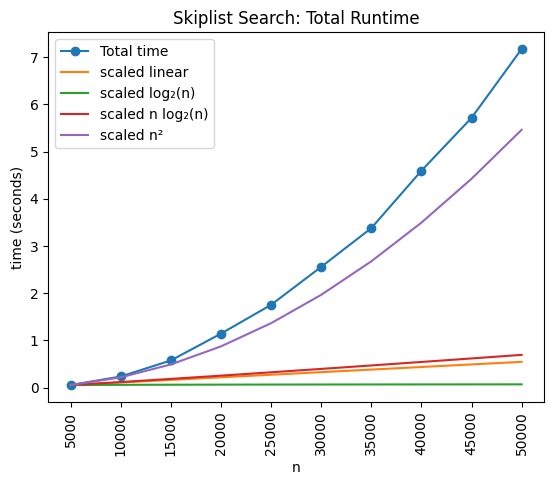

In [6]:
n = []
skiplist_total_times = []
skiplist_avg_times = []

step = 5000
stop = 50000

for i in range(step, stop + 1, step):
    skiplist = SkipList.SkipList()
    n.append(i)
    
    total_time = skiplist.benchmark_search(i, 42)  
    avg_time = total_time / i                       
    
    skiplist_total_times.append(total_time)
    skiplist_avg_times.append(avg_time)


plot_with_reference_curves(n, skiplist_avg_times, label="Avg time per element", title="Skiplist Search: Average Time per Search")
plot_with_reference_curves(n, skiplist_total_times, label="Total time", title="Skiplist Search: Total Runtime", show_n2=True)

**Interpretation:**  The results obtained from the delete benchmark are consistent with the insert and delete benchmarks. The actual time required to search for every inserted element is longer than the time to delete all elements because the list does not shrink in size as the test progresses.

## Bloom Filter

A Bloom filter is a probabilistic data structure that tests whether an element is possibly in a set or definitely not. It uses multiple hash functions to map elements to bits in a fixed size array. By allowing for some ambiguity, bloom filters are much more space efficient than a standard set, and offer all operations including membership checks in O(1) time. While it does not support deletions and can produce false positives, it never produces false negatives. The false positive rate is a tunable parameter that affects the size of the bit array. Bloom filters are often used to reduce accesses to disk or network accesses.

### Bloom Filter Insert

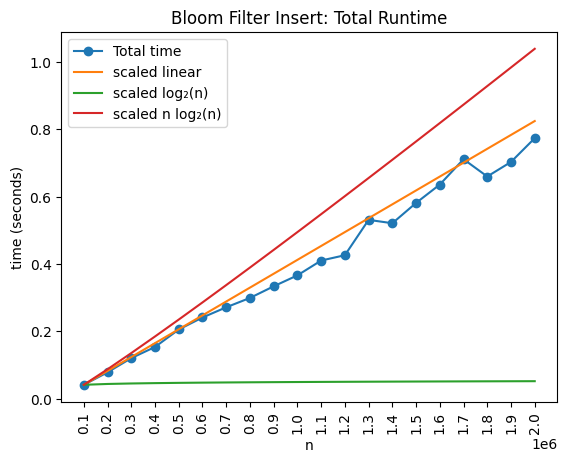

In [7]:
n = []
bloom_insert_times = []

step = 100000
stop = 2000000

for i in range(step, stop+1, step):
    bf = BloomFilter(max_num_items=i, false_positive_rate=0.05)
    n.append(i)
    bloom_insert_times.append(bf.benchmark_insert(i, seed=42))

plot_with_reference_curves(n, bloom_insert_times, label="Total time", title="Bloom Filter Insert: Total Runtime")

Interpretation: The chart confirms the O(1) insert behavior of the Bloom filter, as the total time to insert n elements closely follows the scaled linear reference line. Inserts into the bloom filter only involve setting a constant number of bits in a bitarray, so even one million takes less than one second on the listed machine.

### Bloom Filter Query

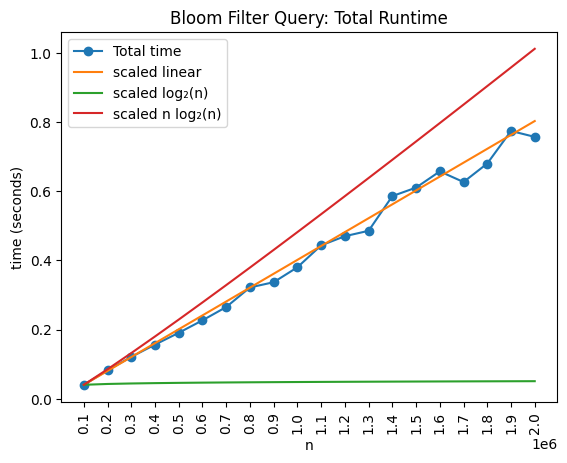

In [8]:
n = []
bloom_query_times = []

step = 100000
stop = 2000000

for i in range(step, stop+1, step):
    bf = BloomFilter(max_num_items=i, false_positive_rate=0.05)
    n.append(i)
    bloom_query_times.append(bf.benchmark_query(i, seed=42))

plot_with_reference_curves(n, bloom_query_times, label="Total time", title="Bloom Filter Query: Total Runtime")


**Interpretation:**  This experiment confirms the O(1) behavior of query, which simply involves checking a constant number of bits in the bit array.

### Bloom Filter False Positive Rate

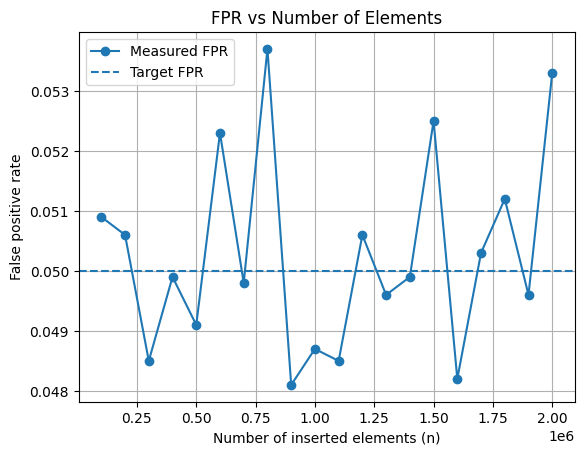

In [9]:
n = []
bloom_fprs = []

step = 100000
stop = 2000000

for i in range(step, stop+1, step):
    bf = BloomFilter(max_num_items=i, false_positive_rate=0.05)
    n.append(i)
    bloom_fprs.append(bf.benchmark_false_positive_rate(i, seed=42))

plot_fpr(n, bloom_fprs, target_fpr=0.05, title="FPR vs Number of Elements")


**Interpretation:**  This chart demonstrates the proprty that Bloom Filters do not gaurantee that the actual false positive rate is below the specified false positive rate because hash collisions can cause variations. It is also observed that the false positive rate is unaffected by the number of elements becasue the underlying bit array is sized according to the expected bumber of elements which is passed as a parameter upon initialization.


### Bloom Filter Load Factor

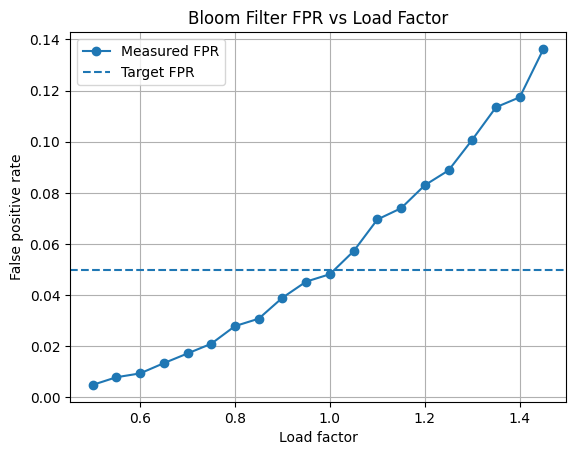

In [10]:
load_factors = []
fprs = []

start = 0.5
stop = 1.5
step = 0.05

lf = start
while lf <= stop:
    load_factors.append(round(lf, 2)) 
    bf = BloomFilter(max_num_items=500000, false_positive_rate=0.05)
    fprs.append(bf.benchmark_load_fpr(lf))
    lf += step

plot_fpr(load_factors, fprs, target_fpr=0.05,title="Bloom Filter FPR vs Load Factor", xlabel="Load factor")


**Interpretation:**  This chart demonstrates the effect on the false positive rate as the load factor increases. Standard Bloom Filters use a fixed size bit array based on the desired false positive rate and the expected number of elements which is fixed after initialization. The false positive rate is well maintained until the Bloom Filter reaches its fixed capacity, but then starts to increase as collisions occur during hashing.

## Cuckoo Filter

A cuckoo filter is a probabilistic data structure used for set membership queries. It stores fingerprints of elements and like bloom filters supports insertions and lookups, but unlike bloom filter supports deletes. By using cuckoo hashing, it maintains high space efficiency while allowing updates including deletes. Cuckoo filters are also well suited for database systems and large applications where many disk or network queries would result in slowdown, and a small number of false positives can be tolerated.

### Cuckoo Filter Insert

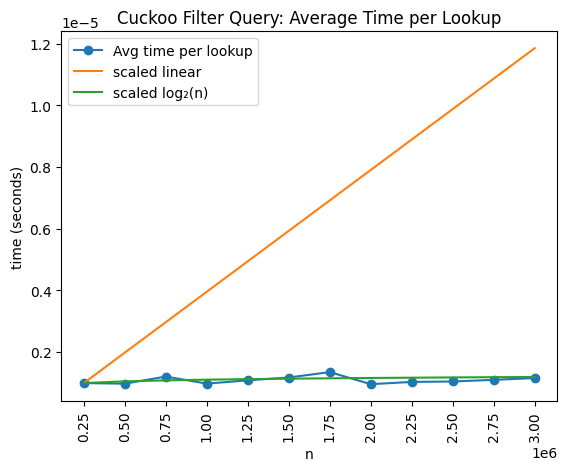

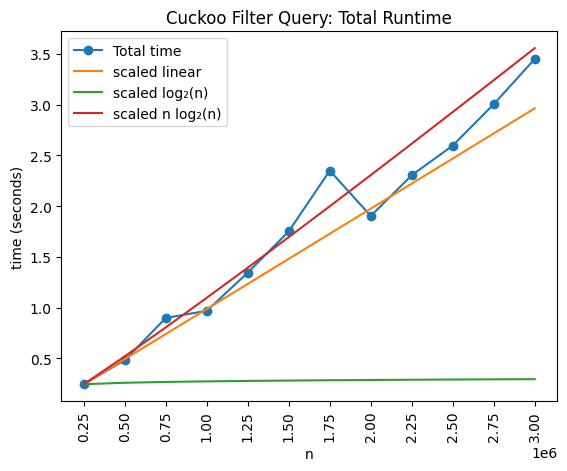

In [11]:
n = []
cuckoo_total_times = []
cuckoo_avg_times = []

step = 250000
stop = 3000000


for i in range(step, stop + 1, step):
    cf = CuckooFilter(target_fp_rate=0.05, max_num_elements=i)
    n.append(i)

    total_time = cf.benchmark_lookup(i, seed=42)
    avg_time = total_time / i

    cuckoo_total_times.append(total_time)
    cuckoo_avg_times.append(avg_time)

plot_with_reference_curves(n, cuckoo_avg_times, label="Avg time per lookup", title="Cuckoo Filter Query: Average Time per Lookup", show_nlogn=False)
plot_with_reference_curves(n, cuckoo_total_times, label="Total time", title="Cuckoo Filter Query: Total Runtime")

**Interpretation:** The charts show that the cuckoo filter tracks very closely with the log(n)/nlog(n) curves for average time per elements and total time respectively. The Cuckoo Filter offers a theoretical O(1) insert provided the number of elements remains below the maximum number of elements specified upon initialization. In practice, inserts may appear slightly slower than ideal O(1) because each insertion can involve multiple constant-time steps such as checking two buckets, performing a bounded number of evictions, and recomputing alternate locations, but the total work per insert remains bounded and independent of n.

### Cuckoo Filter Query

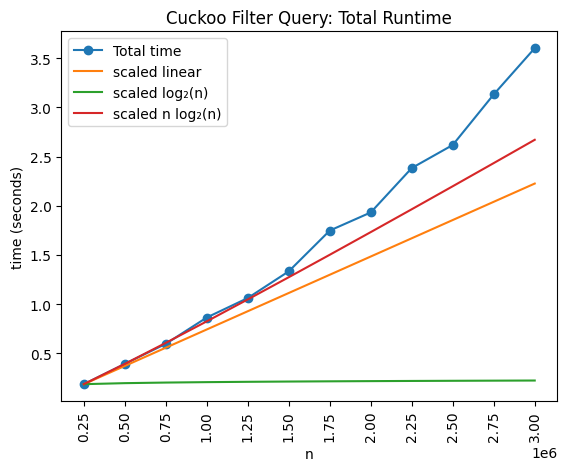

In [12]:
n = []
cuckoo_lookup_times = []

step = 250000
stop = 3000000

for i in range(step, stop+1, step):
    cf = CuckooFilter(target_fp_rate=0.05, max_num_elements=stop)
    n.append(i)
    cuckoo_lookup_times.append(cf.benchmark_lookup(i, seed=42))

plot_with_reference_curves(n, cuckoo_lookup_times, label="Total time", title="Cuckoo Filter Query: Total Runtime")

Interpretation: Similar results are obtained for the query benchmark test, where lookup times remain close to O(1) but appear slightly slower due to constant-factor overhead from computing multiple hash functions, checking multiple buckets, and performing fingerprint comparisons during each query.

### Cuckoo Filter Delete

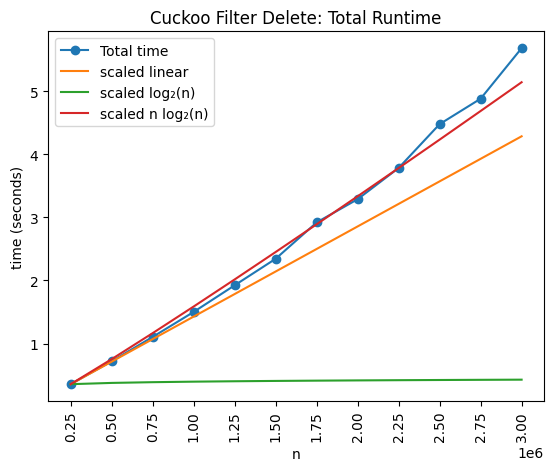

In [13]:
n = []
cuckoo_delete_times = []

step = 250000
stop = 3000000

for i in range(step, stop+1, step):
    cf = CuckooFilter(target_fp_rate=0.05, max_num_elements=stop)
    n.append(i)
    cuckoo_delete_times.append(cf.benchmark_delete(i, seed=42))

plot_with_reference_curves(n, cuckoo_delete_times, label="Total time", title="Cuckoo Filter Delete: Total Runtime")

**Interpretation:** Similar results are obtained for the delete benchmark test, where deletion remains O(1) in theory but appears slightly slower in practice due to the need to locate the fingerprint across multiple candidate buckets and perform additional constant time updates to the underlying bit array.

### Cuckoo Filter False Positive Rate

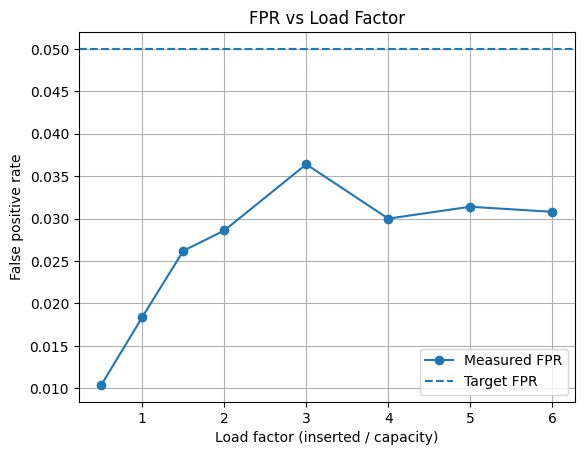

In [14]:
load_factors = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0]
fprs = []

for lf in load_factors:
    cf = CuckooFilter(target_fp_rate=0.05, max_num_elements=5000)  # fixed capacity
    num_elements = int(lf * cf.max_num_elements)
    fprs.append(cf.benchmark_false_positive_rate(num_elements, num_queries=5000, seed=42))

plot_fpr(load_factors, fprs, target_fpr=0.05, title="FPR vs Load Factor", xlabel="Load factor (inserted / capacity)")


**Interpretation:**  The chart shows that the measured false positive rate increases initially and then stabilizes at a point below the target FPR even as the load factor well exceeds the filter's capacity. This occurs because once the filter approaches its capacity, additional insert attempts fail after a bounded number of evictions (max_num_kicks), so the number of stored fingerprints no longer grows. Since the false positive rate depends on the number of successfully stored fingerprints rather than the number of attempted inserts, it stops increasing even as the load factor increases.

### Cuckoo Filter Paramater Tests

In [15]:
# A new Cuckoo Filter object is instantiated for every configuration in the benchmark function
sensitivity_results = cf.benchmark_parameter_sensitivity(n=10000,bucket_sizes=[2, 4, 8],fp_rates=[0.01, 0.05, 0.1],seed=42)
columns = [("Bucket Size", "bucket_size"),("Target FPR", "target_fp"),("Insert Time (s)", "insert_time"),("Lookup Time (s)", "lookup_time"),("Measured FPR", "fpr")]
print_markdown_table(sensitivity_results, columns)

| Bucket Size | Target FPR | Insert Time (s) | Lookup Time (s) | Measured FPR |
| :-----------: | :----------: | :---------------: | :---------------: | :------------: |
| 2 | 0.01 | 0.0234 | 0.0171 | 0.0032 |
| 2 | 0.05 | 0.0208 | 0.0155 | 0.0179 |
| 2 | 0.1 | 0.0209 | 0.0155 | 0.0338 |
| 4 | 0.01 | 0.0233 | 0.0241 | 0.0035 |
| 4 | 0.05 | 0.0161 | 0.0147 | 0.017 |
| 4 | 0.1 | 0.0229 | 0.0234 | 0.0344 |
| 8 | 0.01 | 0.0298 | 0.041 | 0.0037 |
| 8 | 0.05 | 0.0299 | 0.0414 | 0.0155 |
| 8 | 0.1 | 0.0189 | 0.0234 | 0.0336 |

**Interpretation:**  This test measures how the Cuckoo Filter’s insert time, lookup time, and false positive rate change for different bucket sizes and target false positive rates. Larger buckets generally reduce the actual FPR but can slightly increase lookup time, while small target FPRs increase fingerprint size and may slow inserts. For all configurations, the filter maintains a false positive rate below the specified rate and both insert and lookup times are relatively low. It is important to note that the number of elements tested is relatively low (10,000) due to the number of configurations tested. Larger filters were tested and yielded similiar results.

## KD tree

A KD tree is a binary tree that organizes points in multidimensional space. Each level of the tree splits the data along a single dimension, which alternates at every levels. Compared to linear scan, KD trees offer a significant improvement for nearest neighbor queries by reducing the search space at every level of recursion.

### KD Tree Build + Query

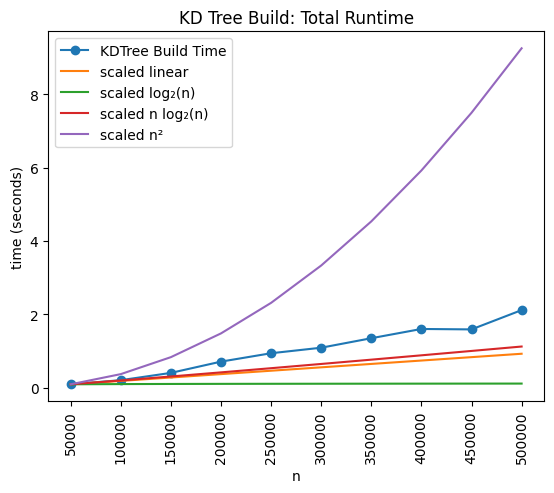

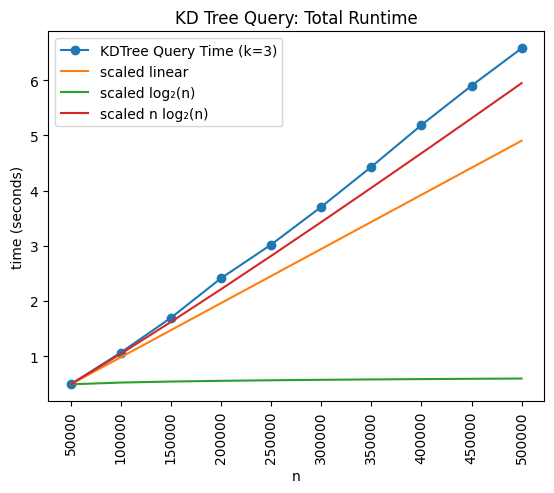

In [16]:
stop = 500000
step = 50000
k_neighbors = 3 
tree = KDTree([])  # initialize with empty points, root will be replaced in benchmark
results = []
x = []
y_build = []
y_query = []

for n in range(step, stop + 1, step): 
    t_build = tree.benchmark_build(num_points=n, seed=42)
    t_query = tree.benchmark_query(num_points=n, k=k_neighbors, seed=42)
    
    results.append({
        "num_points": n,
        "k_neighbors": k_neighbors,
        "build_time": t_build,
        "query_time": t_query
    })
    
    x.append(n)
    y_build.append(t_build)
    y_query.append(t_query)

columns = [("Number of Points", "num_points"), ("k Neighbors", "k_neighbors"), ("Build Time (s)", "build_time"), ("Query Time (s)", "query_time")]

plot_with_reference_curves(x, y_build, label="KDTree Build Time", show_n2=True, title="KD Tree Build: Total Runtime")
plot_with_reference_curves(x, y_query, label="KDTree Query Time (k=" + str(k_neighbors) + ")", title="KD Tree Query: Total Runtime")


**Interpretation:**  These charts show that the KD tree exhibits the expected O(n log n) behavior for insert and delete operations on n elements. The variation from the scaled n log n curve can be attributed to constant factors in the implementation and recursion overhead, but the asymptotic behavior remains far from $O(n^2)$.


## VP Tree

A vantage point tree is a binary tree that organizes data using distances between the points rather than coordinate values. Each node chooses a reference point and splits the remaining data based on whether points fall inside or outside a chosen distance threshold. Compared to linear scan, VP-trees improve nearest-neighbor queries by pruning large portions of the search space during recursion similiar to KD trees.

### VP Tree Build + Query

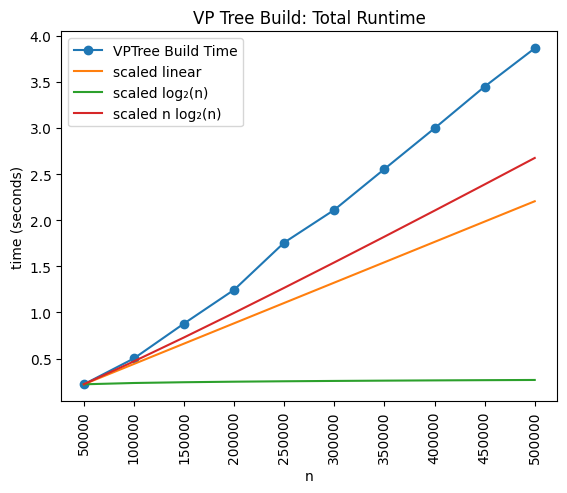

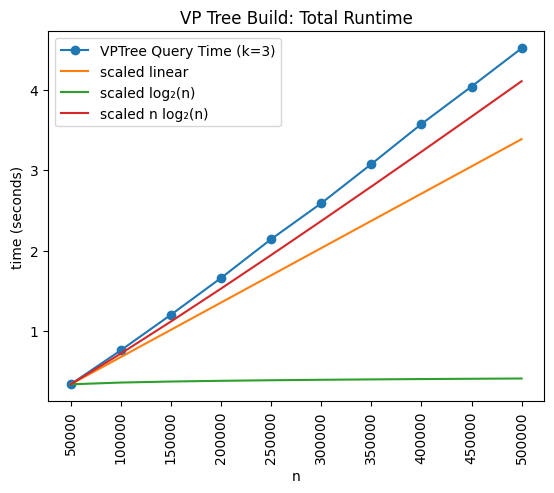

In [17]:
stop = 500000
step = 50000
k_neighbors = 3 
tree = VPTree([])  # initialize with empty points, root will be replaced in benchmark
results = []
x = []
y_build = []
y_query = []

for n in range(step, stop + 1, step):
    t_build = tree.benchmark_build(num_points=n, seed=42)
    t_query = tree.benchmark_query(num_points=n, k=k_neighbors, seed=42)
    
    results.append({
        "num_points": n,
        "k_neighbors": k_neighbors,
        "build_time": t_build,
        "query_time": t_query
    })
    
    x.append(n)
    y_build.append(t_build)
    y_query.append(t_query)

columns = [("Number of Points", "num_points"), ("k Neighbors", "k_neighbors"), ("Build Time (s)", "build_time"), ("Query Time (s)", "query_time")]

plot_with_reference_curves(x, y_build, label="VPTree Build Time", title="VP Tree Build: Total Runtime")
plot_with_reference_curves(x, y_query, label="VPTree Query Time (k=" + str(k_neighbors) + ")", title="VP Tree Build: Total Runtime")


**Interpretation:**  These charts show that the Vantage Point tree exhibits the expected O(nlogn) behavior for insert and delete operations of n elements.

## Heap

A heap is a tree-based data structure that maintains a partial ordering, where each parent node is ordered relative to its children according to a heap property. This structure enables efficient access to the minimum or maximum element without requiring full sorting. Heaps are used to implement priority queues and play an important role in algorithms such as Dijkstra’s and Prim’s. Because heaps are implemented as balanced trees, they offer logarithmic performance for all operations.

### Heap Insert + Delete

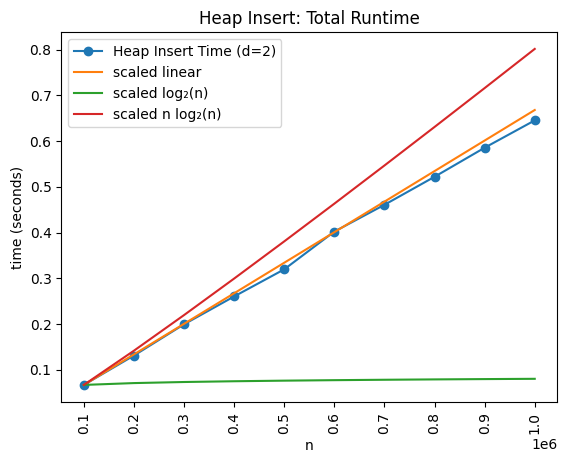

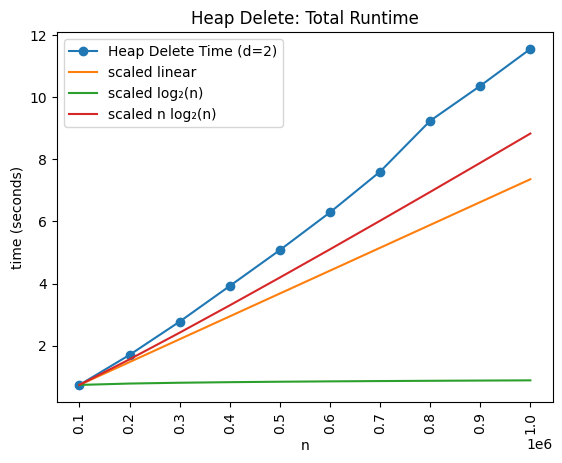

In [18]:
stop = 1000000
step = 100000

results = []
x = []
y_insert = []
y_delete = []

heap = ArrayMaxHeap(branching_factor=2)

for n in range(step, stop + 1, step):
    t_insert = heap.benchmark_insert(n, seed=42)
    t_delete = heap.benchmark_delete(n, seed=42)

    results.append({
        "num_elements": n,
        "branching_factor": 2,
        "insert_time": t_insert,
        "delete_time": t_delete
    })

    x.append(n)
    y_insert.append(t_insert)
    y_delete.append(t_delete)

columns = [("Number of Elements", "num_elements"), ("Branching Factor", "branching_factor"), ("Insert Time (s)", "insert_time"), ("Delete Time (s)", "delete_time")]

plot_with_reference_curves(x, y_insert, label="Heap Insert Time (d=2)", title="Heap Insert: Total Runtime")
plot_with_reference_curves(x, y_delete, label="Heap Delete Time (d=2)", title="Heap Delete: Total Runtime")

**Interpretation:**  This benchmarks finds that inserting n elements into the heap outperforms the expected O(nlogn) behavior as well as scaled linear curve. This can likely be attributed to the fact that the heap is implemented as an array which reduces pointer overhead and improves cache locality. The delete benchmark demonstrates the expected O(nlogn) bahevior to insert n elemnts into the heap.

### Heap Branching Factor

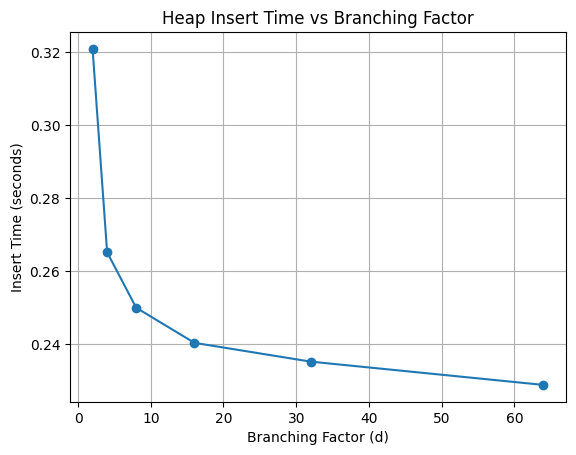

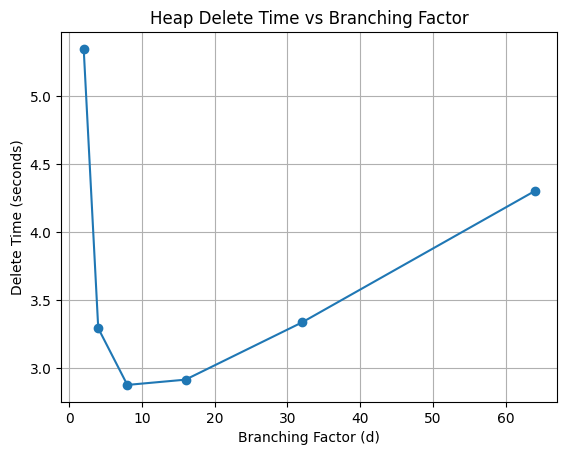

In [19]:
branching_factors = [2, 4, 8, 16, 32, 64]
num_elements = 500000

x = []
y_insert = []
y_delete = []
results = []

for d in branching_factors:
    heap = ArrayMaxHeap(branching_factor=d)

    t_insert = heap.benchmark_insert(num_elements, seed=42)
    t_delete = heap.benchmark_delete(num_elements, seed=42)

    results.append({
        "branching_factor": d,
        "num_elements": num_elements,
        "insert_time": t_insert,
        "delete_time": t_delete
    })

    x.append(d)
    y_insert.append(t_insert)
    y_delete.append(t_delete)

columns = [("Branching Factor", "branching_factor"), ("Number of Elements", "num_elements"), ("Insert Time (s)", "insert_time"), ("Delete Time (s)", "delete_time")]

plt.figure()
plt.plot(x, y_insert, marker='o')
plt.xlabel("Branching Factor (d)")
plt.ylabel("Insert Time (seconds)")
plt.title("Heap Insert Time vs Branching Factor")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(x, y_delete, marker='o')
plt.xlabel("Branching Factor (d)")
plt.ylabel("Delete Time (seconds)")
plt.title("Heap Delete Time vs Branching Factor")
plt.grid(True)
plt.show()


This test demonstrates that increasing the branching factor reduces the height of the heap which reduces the number of levels traversed during inserts. Insert performance levels off around a branching factor of ~16 because the heap becomes shallow enough that further height reductions provide little benefit relative to constant overhead. Delete operations initially improve as height decreases but require scanning all children at each level to find the maximum, and beyond a branching factor of ~16 the cost of scanning many children dominates, causing delete performance to increase despite the shorter heap. These results are consistent with those found in the textbook.